## problem 2

In [1]:
from sklearn.datasets import load_digits
from sklearn import manifold, decomposition
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler
np.random.seed(2022)

In [2]:
digits = load_digits(n_class = 7)
X, y = digits.data, digits.target
n_samples, n_features = X.shape

In [11]:
def plot_embedding(X, y, title):
    fig, ax = plt.subplots(figsize = (18, 18))
    X = MinMaxScaler().fit_transform(X)
    for i in range(X.shape[0]):
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
            X[i],
            bboxprops = dict(color=plt.cm.Dark2(y[i]))
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)
    plt.title(title)
    plt.axis("off")
    plt.show()

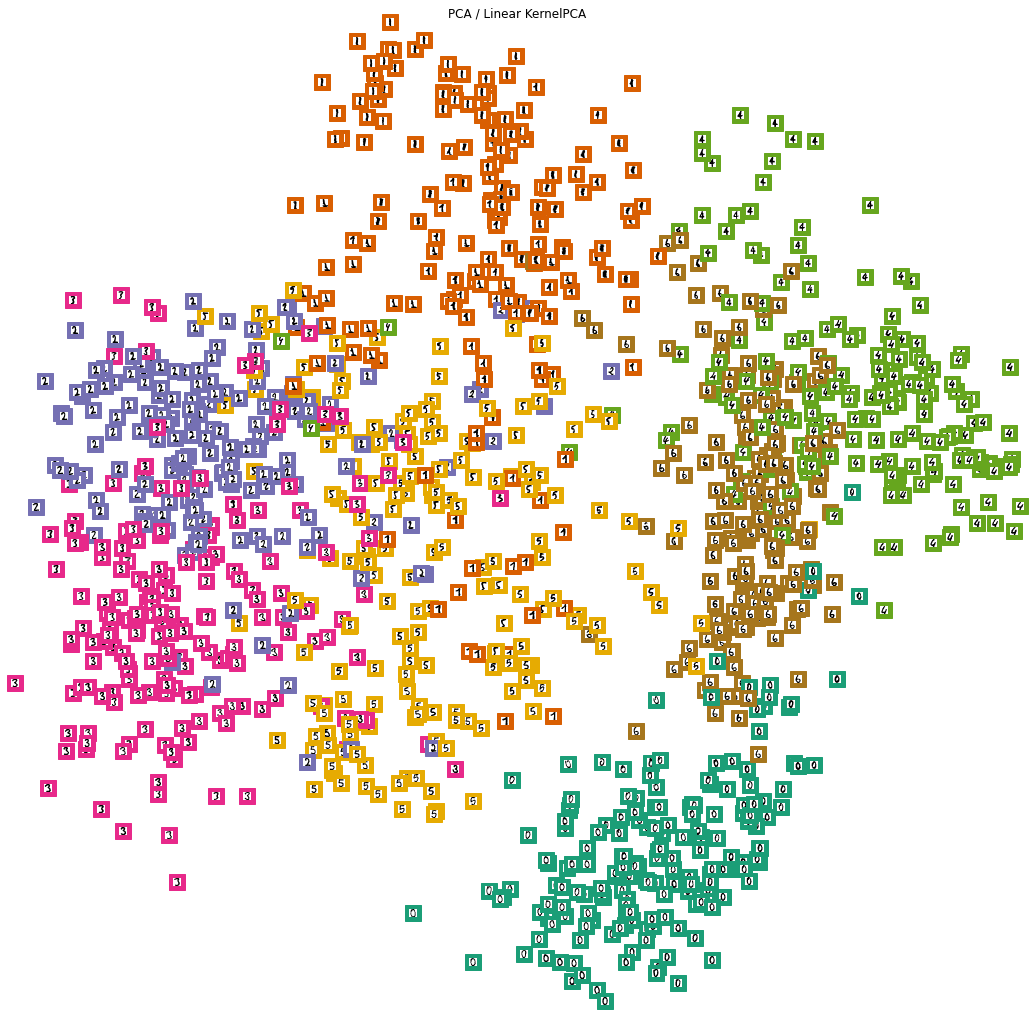

In [19]:
## pca
X_pca = decomposition.PCA(n_components = 2).fit_transform(X)
plot_embedding(X_pca, y, 'PCA / Linear KernelPCA')

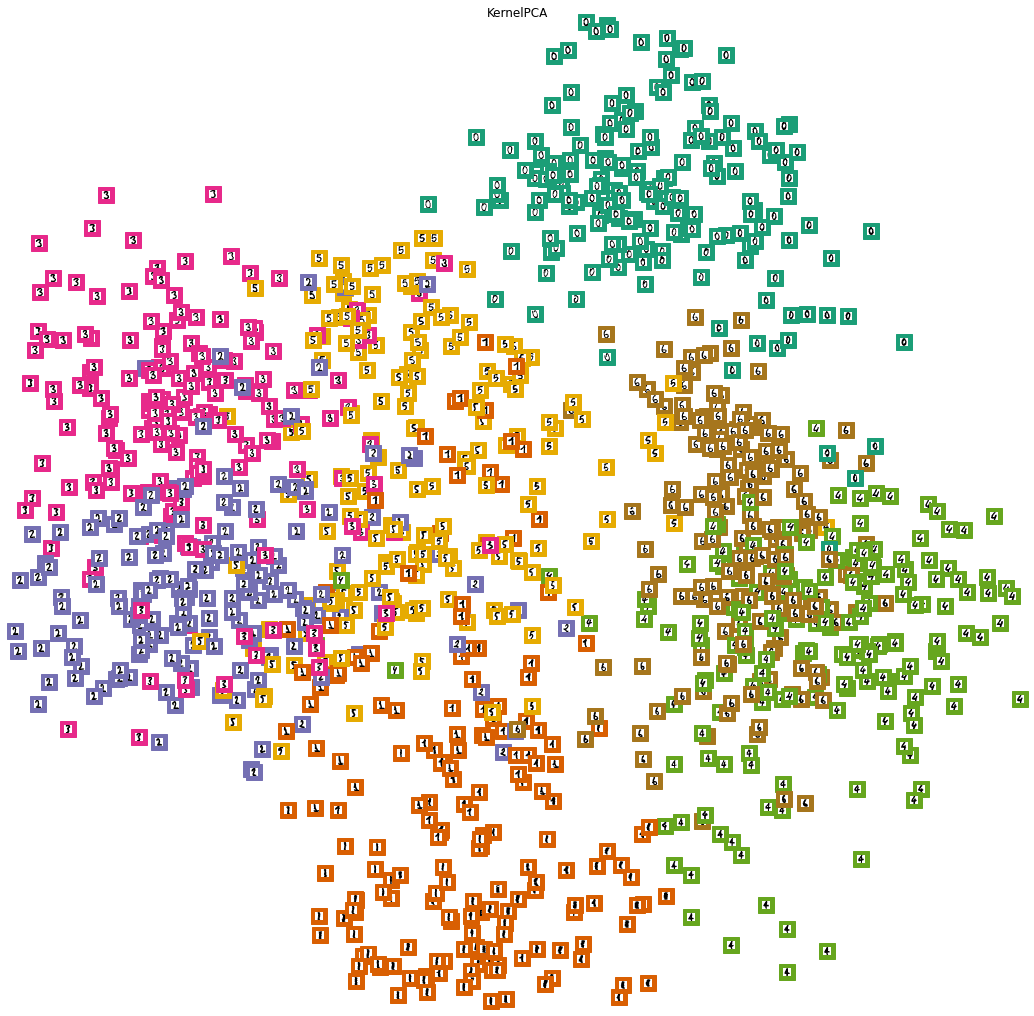

In [18]:
## k-pca, degree 2
X_kpca_2 = decomposition.KernelPCA(n_components = 2, kernel = 'poly', degree = 2).fit_transform(X)
plot_embedding(X_kpca_2, y, 'KernelPCA')

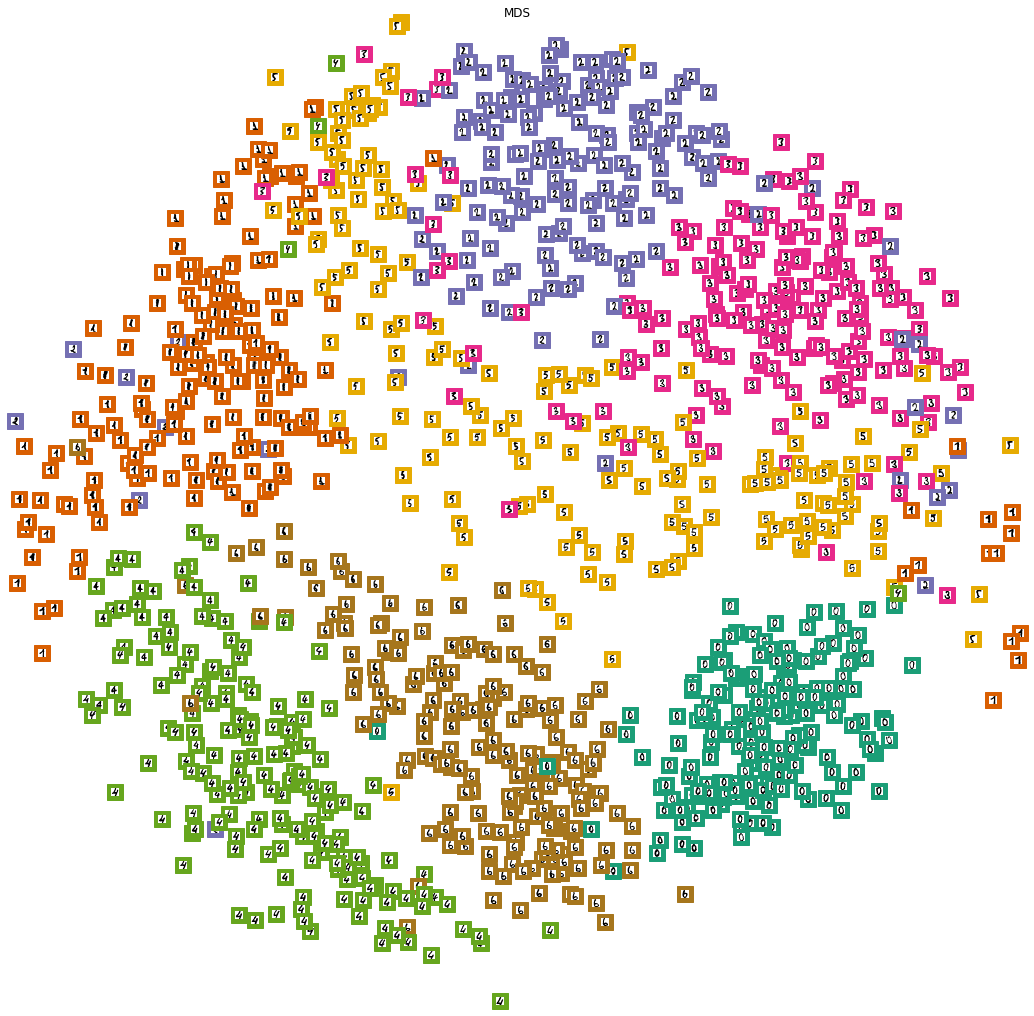

In [15]:
## mds
X_mds = manifold.MDS(n_components = 2).fit_transform(X)
plot_embedding(X_mds, y, 'MDS')

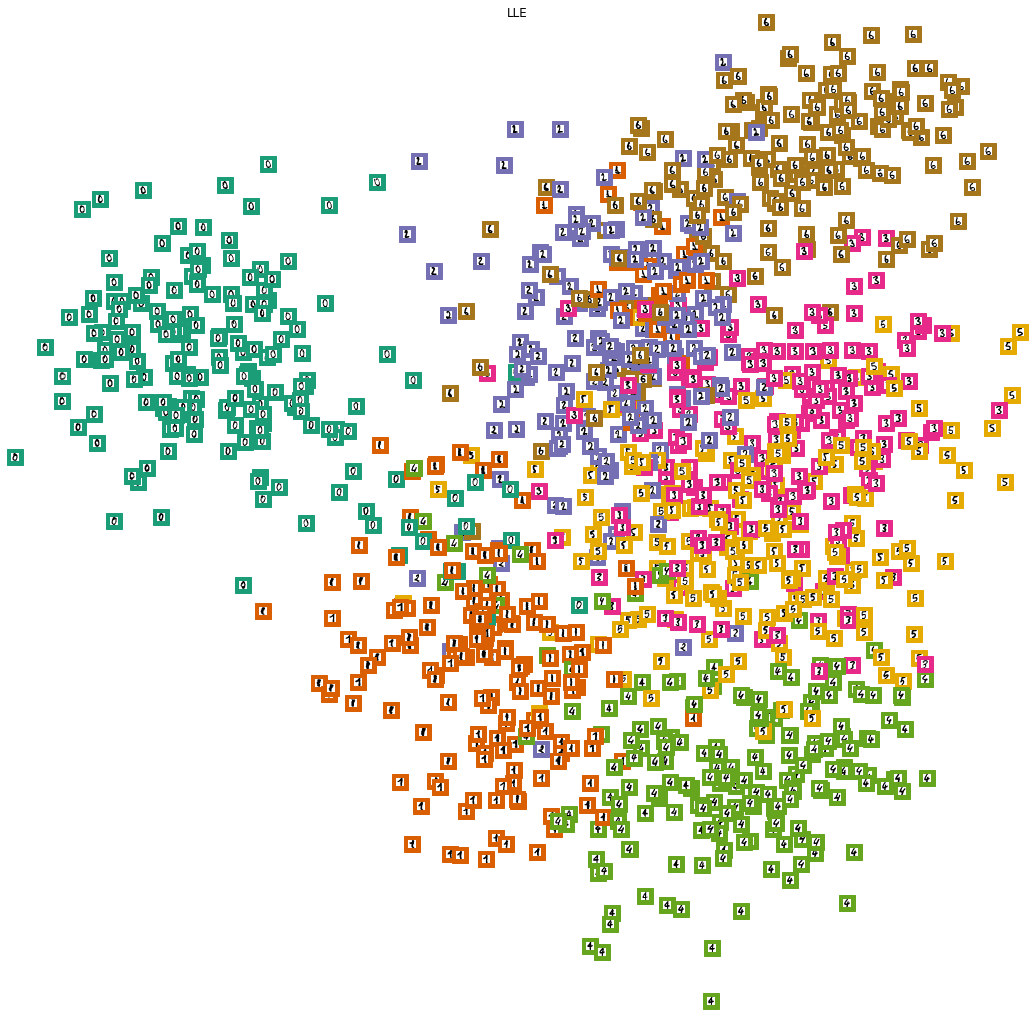

In [16]:
## lle
X_lle = manifold.LocallyLinearEmbedding(n_neighbors = 500, n_components = 2).fit_transform(X)
plot_embedding(X_lle, y, 'LLE')

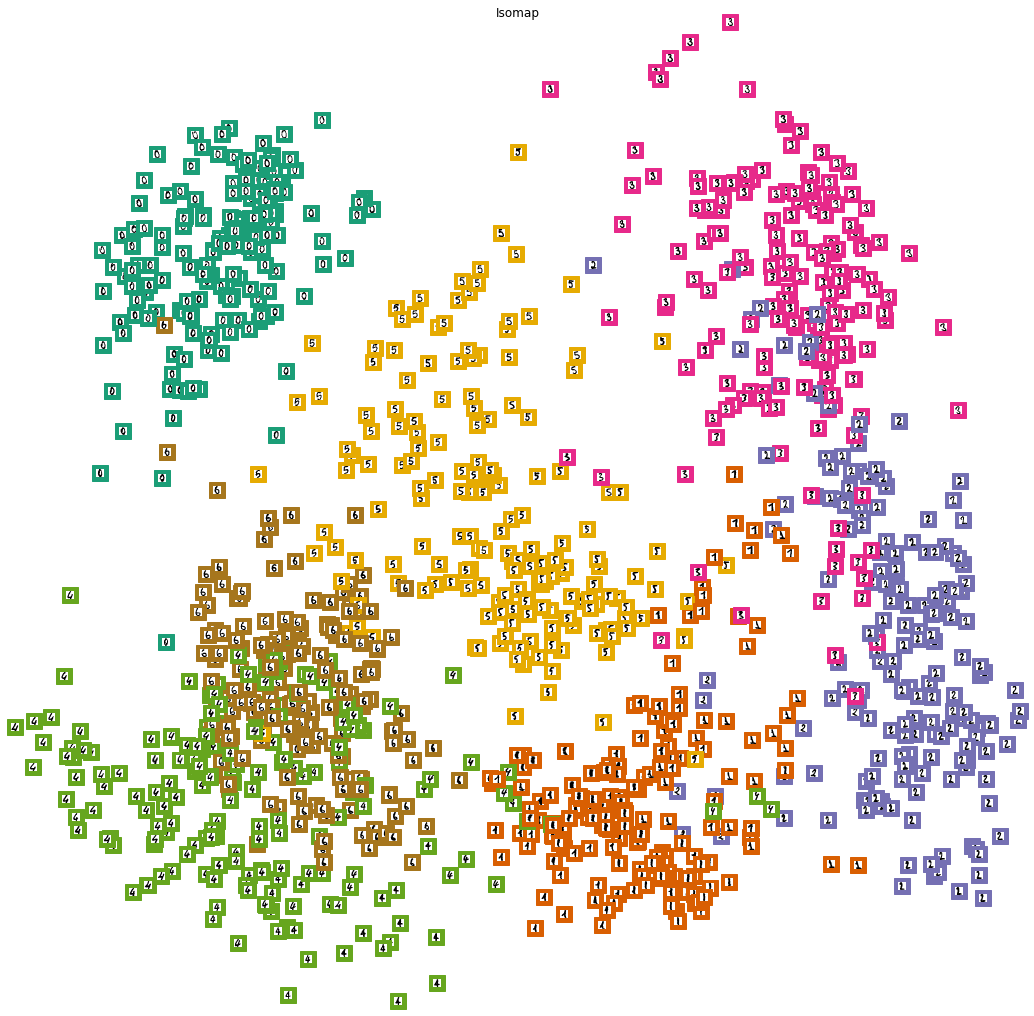

In [17]:
## isomap
X_iso = manifold.Isomap(n_neighbors = 20, n_components = 2).fit_transform(X)
plot_embedding(X_iso, y, 'Isomap')

## problem 3

In [72]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2022)

In [73]:
digits = load_digits(n_class = 10)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [74]:
# Fit MLPClassifier to the training data
mlp = MLPClassifier(max_iter = 1000, activation = 'relu', hidden_layer_sizes = 200).fit(X_train, y_train)

# Use the trained MLPClassifier to predict the class labels
y_pred = mlp.predict(X_test)

# Compute the accuracy on the test set
print('Testing score:', mlp.score(X_test, y_test))

print('\nParameters - ')
print('Activation:', mlp.get_params()['activation'])
print('Hidden layer sizes:', mlp.get_params()['hidden_layer_sizes'])

Testing score: 0.9749652294853964

Parameters - 
Activation: relu
Hidden layer sizes: 200


Testing MSE: 0.05810045861956256

Parameters - 
Activation: relu
Hidden layer sizes: 200


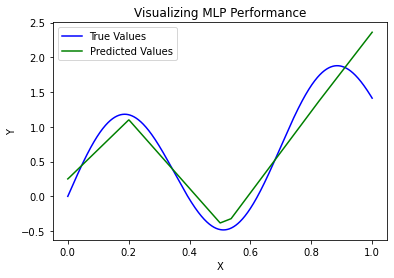

In [75]:
n = 300
xtrain = np.sort(np.random.rand(n))
ytrain = np.sin(9 * xtrain) + xtrain + np.sqrt(1 / 5.0) * np.random.randn(n)
xtest = np.linspace(0, 1, 1001)
ytest = np.sin(9 * xtest) + xtest

# Fit MLPRegressor to training data.
mlp = MLPRegressor(max_iter = 1000, activation = 'relu', hidden_layer_sizes = 200).fit(xtrain.reshape(-1, 1), ytrain)

# Use the trained MLPRegressor to predict regression outputs
ypred = mlp.predict(xtest.reshape(-1, 1))

# Compute mean squared error on test set, plot network output
print('Testing MSE:', mean_squared_error(ytest, ypred))

plt.plot(xtest, ytest, color = 'b', label = 'True Values');
plt.plot(xtest, ypred, color = 'g', label = 'Predicted Values');
plt.xlabel('X');
plt.ylabel('Y');
plt.legend();
plt.title('Visualizing MLP Performance')

print('\nParameters - ')
print('Activation:', mlp.get_params()['activation'])
print('Hidden layer sizes:', mlp.get_params()['hidden_layer_sizes'])